In [1]:
!pip install mnist

## Задание №2

### Подготовка

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import mnist

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [3]:
X_train = mnist.train_images()
y_train = mnist.train_labels()

dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)

### Ну что, народ, погнали

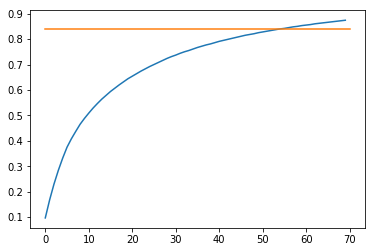

In [4]:
ev_ = 0.84 # доля объясненной дисперсии должна превышать это значение
M = 0
pca = PCA(n_components=70, svd_solver='full')
pca.fit(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
for i, ev in enumerate(explained_variance):
    if ev > ev_:
        M = i + 1
        break

plt.plot(np.arange(70), explained_variance)
plt.plot([0, 70], [0.84, 0.84]);

In [5]:
print(f' Необходимо {M} компонент(ы)')

 Необходимо 56 компонент(ы)


In [6]:
pca = PCA(n_components=M, svd_solver='full')
pca.fit(X_train)
X_test_transformed = pca.transform(X_train)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_test_transformed, y_train, test_size=0.3, random_state=95)

In [8]:
print('Выборочное среднее нулевой колонки для полученного тренировочного набора')
print(sum([i[0] for i in X_train]) / len(X_train))

Выборочное среднее нулевой колонки для полученного тренировочного набора
2.971617310280497


Алгоритм случайного леса

In [9]:
rfc = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=95)
clf1 = OneVsRestClassifier(rfc).fit(X_train, y_train)

y_pred = clf1.predict(X_test)
CM = confusion_matrix(y_test, y_pred)

In [10]:
P = 4
print(f'Число верно определенных классов {P}: {CM[P][P]}')

Число верно определенных классов 4: 1603


Логическая регрессия

In [11]:
#reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())
from sklearn.linear_model import LogisticRegression

rfc = LogisticRegression(solver='lbfgs', random_state=95)
clf2 = OneVsRestClassifier(rfc).fit(X_train, y_train)

y_pred = clf2.predict(X_test)
CM = confusion_matrix(y_test, y_pred)

c:\users\orl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\orl\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

In [12]:
P = 6
print(f'Число верно определенных классов {P}: {CM[P][P]}')

Число верно определенных классов 6: 1715


Дерево принятия решений

In [13]:
from sklearn.tree import DecisionTreeClassifier

rfc = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, random_state=95)
clf3 = OneVsRestClassifier(rfc).fit(X_train, y_train)

y_pred = clf3.predict(X_test)
CM = confusion_matrix(y_test, y_pred)

In [14]:
P = 7
print(f'Число верно определенных классов {P}: {CM[P][P]}')

Число верно определенных классов 7: 1725


In [15]:
data = pd.read_csv('pred_for_task.csv', index_col='FileName')
X_test = data.drop('Label', axis=1)
X_test = pca.transform(X_test)
y_test = data['Label']

Вероятность отнесения первого изображения к соответствующему классу: Алгоритм случайного леса

In [16]:
y_pred = clf1.predict(X_test)
proba = clf1.predict_proba([X_test[3-1]])[0][1]
print(f'вероятность1: {proba}')

вероятность1: 0.9975172768286159


Вероятность отнесения второго изображения к соответствующему классу: Алгоритм логической регрессии

In [17]:
y_pred = clf2.predict(X_test)
proba = clf2.predict_proba([X_test[1-1]])[0][7]
print(f'вероятность2: {proba}')

вероятность2: 0.9149167179439787


Вероятность отнесения третьего изображения к соответствующему классу: Дерево принятия решений

In [18]:
y_pred = clf3.predict(X_test)
proba = clf3.predict_proba([X_test[23-1]])[0][6]
print(f'вероятность3: {proba}')

вероятность3: 0.9887077829599199
